In [618]:
import numpy as  np

X_train=(np.load("/content/x_train.npy"))
y_train=(np.load("/content/y_train.npy"))
X_test=(np.load('/content/x_test.npy'))
y_test=(np.load('/content/y_test.npy'))

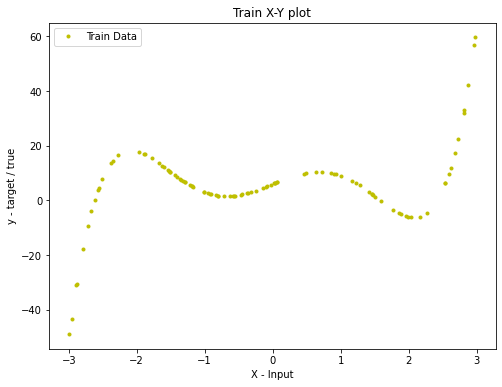

In [619]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
plt.plot(X_train, y_train, 'y.')
plt.legend(["Train Data"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Train X-Y plot')
plt.show()

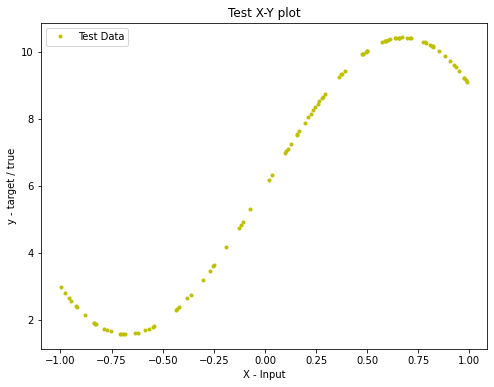

In [620]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
plt.plot(X_test, y_test, 'y.')
plt.legend(["Test Data"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Test X-Y plot')
plt.show()

**There is non linear relationship between the features and the dependent variables**

In [621]:
import numpy as np
import pandas

class Generalized_linear_model:
  def __init__(self,variables=1 ,bs=100, degrees=1, epochs=1000, lr=0.001,regularization="None",lambda_=1):
      ## Initializing weights and biases to 0
      self.variables=variables
      self.bs=bs
      self.w=np.zeros(variables)
      self.b=0
      self.epochs=epochs
      self.degrees=degrees
      self.regularization=regularization
      self.lambda_=lambda_
      self.lr=lr

  def loss(self, y, y_hat):
    reg=0
    if(self.regularization=="L1"):
        reg=np.sum(np.abs(self.w))*self.lambda_
    if(self.regularization=="L2"):
        reg=np.sum(self.w**2)*self.lambda_
    loss=np.mean((y_hat-y)**2)+reg
    return loss

  def gradients(self, X,y,y_hat):
    m=X.shape[0]

    if(self.regularization=="None"):
      dw=(1/m)*np.dot(X.T,(y_hat-y))
      db=(1/m)*np.sum((y_hat-y))

    if(self.regularization=="L1"):
      dw = (1/m)*(-(2*np.dot(X.T,(y_hat-y))) + (2*self.lambda_*self.w))
      db = -2*(1/m)*np.sum((y_hat-y))

    if(self.regularization=="L2"):
      dw = (1/m)*(-(2*np.dot(X.T,(y_hat-y))) + (self.lambda_))
      db = -2*(1/m)*np.sum((y_hat-y))
    return dw, db

  def x_transform(self, X, degrees):
    t=X.copy()
    for i in range(0,degrees):
      X=np.append(X, t**i, axis=1)
    return X
  
  def fit(self, X, y):
    self.X=X
    self.y=y
    if type(X)==pandas.core.frame.DataFrame:
      X=(X).to_numpy()
    else:
      pass
    x = self.x_transform(X, self.degrees)
    m, n = self.X.shape
    
    # Reshaping y.
    y = pandas.Series(self.y).to_numpy().reshape(m,1)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(self.epochs):
        for i in range((m-1)//self.bs + 1):
            
            # Defining batches.
            start_i = i*self.bs
            end_i = start_i + self.bs
            xb = self.X[start_i:end_i]
            yb = self.y[start_i:end_i]
            
            # Calculating hypothesis
            y_hat = np.dot(xb, self.w) + self.b
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = self.gradients(xb, yb, y_hat)

            # Updating the parameters.
            self.w -= self.lr*dw
            self.b -= self.lr*db
        
        # Calculating loss and appending it in the list.
        l = self.loss(y, np.dot(X, self.w) + self.b)
        losses.append(l)
        
    # returning weights, bias and losses(List).
    #return w, b, losses

  def predict(self,X ):
    if type(X)==pandas.core.frame.DataFrame:
      X=(X).to_numpy()
    else:
      pass
    return np.dot(X, self.w) + self.b

In [622]:
GLM=Generalized_linear_model(bs=1500, degrees=2, epochs=10000, lr=0.01,regularization="None",lambda_=1)
GLM.fit(X_train,y_train)

In [623]:
y_pred=GLM.predict(X_test)

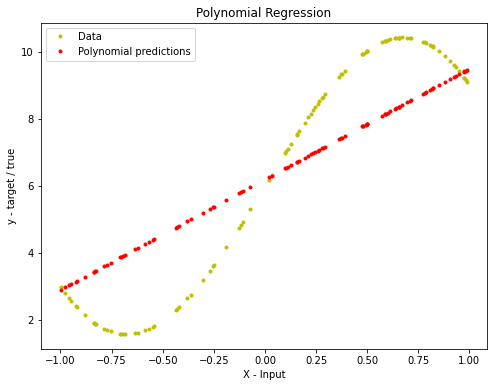

In [624]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
plt.plot(X_test, y_test, 'y.')
plt.plot(X_test, y_pred, 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

Basis Function:-
As the relationship is non linear we can try to map the basis function as a polynomial function. As a horizontal line will cut through the training data at 5 points and test data at 2 points. The training of the data should be started with using polynomial basis function of degree 5.

We can also try polynomial basis function of other degress such as  2, 3 & 4,  for checking result.

**Basis function of degree 5**

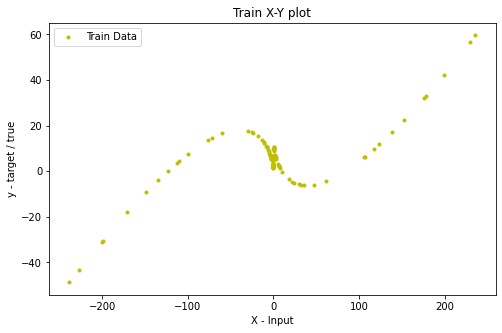

In [625]:
X_train_power=np.power(X_train,5)
X_train_power

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
plt.plot(X_train_power, y_train, 'y.')
plt.legend(["Train Data"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Train X-Y plot')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in subtract


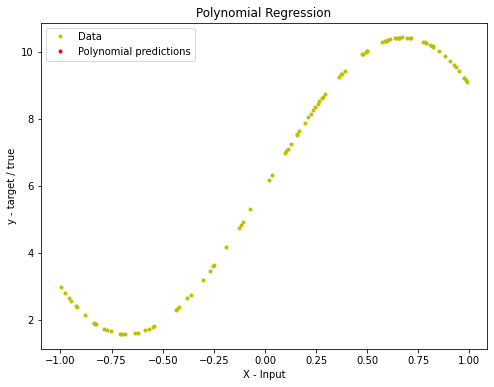

In [626]:
GLM=Generalized_linear_model(bs=1500, degrees=1, epochs=10000, lr=0.01,regularization="None",lambda_=1)
GLM.fit(X_train_power,y_train)
y_pred=GLM.predict(X_test)

fig = plt.figure(figsize=(8,6))
plt.plot(X_test, y_test, 'y.')
plt.plot(X_test, y_pred, 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

**Basis function of degree 3**

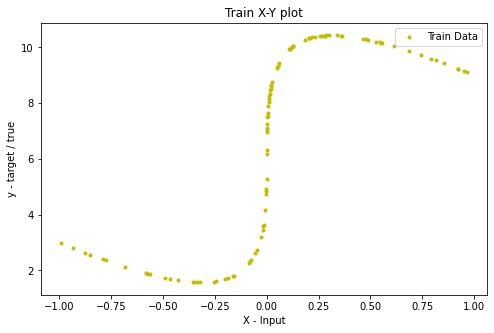

In [627]:
X_train_power_3=np.power(X_test,3)
X_train_power

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
plt.plot(X_train_power_3, y_test, 'y.')
plt.legend(["Train Data"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Train X-Y plot')
plt.show()

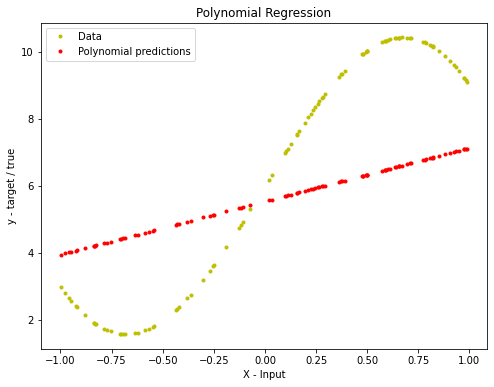

In [628]:
GLM=Generalized_linear_model(bs=1500, degrees=1, epochs=10000, lr=0.01,regularization="None",lambda_=1)
GLM.fit(X_train_power_3,y_train)
y_pred=GLM.predict(X_test)

fig = plt.figure(figsize=(8,6))
plt.plot(X_test, y_test, 'y.')
plt.plot(X_test, y_pred, 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

**Basis function of degree 4**

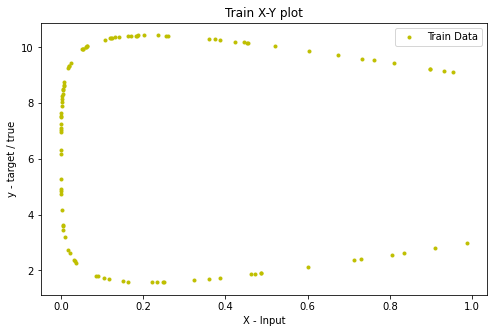

In [629]:
X_train_power_4=np.power(X_test,4)
X_train_power

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
plt.plot(X_train_power_4, y_test, 'y.')
plt.legend(["Train Data"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Train X-Y plot')
plt.show()

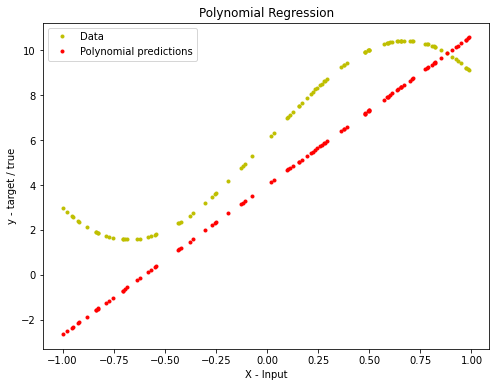

In [630]:
GLM=Generalized_linear_model(bs=1500, degrees=1, epochs=10000, lr=0.01,regularization="None",lambda_=1)
GLM.fit(X_train_power_4,y_train)
y_pred=GLM.predict(X_test)

fig = plt.figure(figsize=(8,6))
plt.plot(X_test, y_test, 'y.')
plt.plot(X_test, y_pred, 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

**Basis function of degree 2**

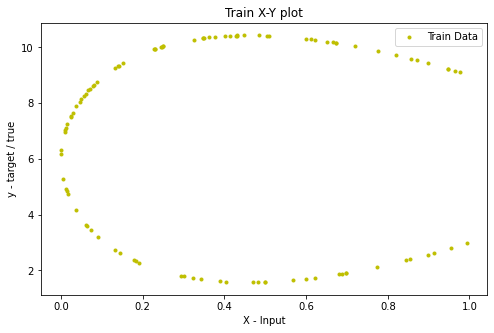

In [631]:
X_train_power_2=np.power(X_test,2)
X_train_power

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
plt.plot(X_train_power_2, y_test, 'y.')
plt.legend(["Train Data"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Train X-Y plot')
plt.show()

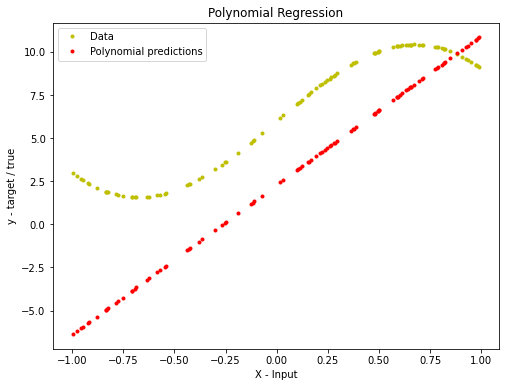

In [632]:
GLM=Generalized_linear_model(bs=1500, degrees=1, epochs=10000, lr=0.01,regularization="None",lambda_=1)
GLM.fit(X_train_power_2,y_train)
y_pred=GLM.predict(X_test)

fig = plt.figure(figsize=(8,6))
plt.plot(X_test, y_test, 'y.')
plt.plot(X_test, y_pred, 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

In [633]:
import pandas as pd

df=pd.read_csv('/content/Assignment1_Q2_Data.csv')
df.head(10)

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9
5,6,3.8910,1.0,4.455,0.988,1.0,6,3,56,2,1,0,29.9
6,7,5.8980,1.0,5.850,1.240,1.0,7,3,51,2,1,1,30.9
7,8,5.6039,1.0,9.520,1.501,0.0,6,3,32,1,1,0,28.9
8,9,16.4202,2.5,9.800,3.420,2.0,10,5,42,2,1,1,84.9
9,10,14.4598,2.5,12.800,3.000,2.0,9,5,14,4,1,1,82.9


In [634]:
# Shuffle your dataset 
shuffle_df = df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(df))

train_set_df = shuffle_df[:train_size]
test_set_df = shuffle_df[train_size:]

x_train_1=(train_set_df.iloc[:,1:12])
y_train_1=(train_set_df.iloc[:,-1])


x_test_1=(test_set_df.iloc[:,1:12])
y_test_1=(test_set_df.iloc[:,-1])

In [635]:
x_train_1.shape

(19, 11)

In [636]:
GLM=Generalized_linear_model(variables=11, bs=150, degrees=1, epochs=4000, lr=0.0001,regularization="None",lambda_=1)
GLM.fit(x_train_1,y_train_1)

In [637]:
y_pred_1=GLM.predict(x_test_1)

In [638]:
y_pred_1

array([34.34844392, 33.2524779 , 30.1190677 , 42.24896518, 26.55811487,
       33.25062133, 24.12927329, 29.06069924, 28.02378821])

In [639]:
# MSE
MSE = np.square(np.subtract(y_test_1,y_pred_1)).mean()
MSE

10.87903470145492

The mean squared error is 10.87

In [640]:
df.columns

Index(['House ID', 'Local Price', 'Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home',
       'Construction type', 'Architecture type', '# Fire places',
       'Price (1000$)'],
      dtype='object')

In [641]:
# Calculating the weights 
x=list(GLM.w)
y=list(x_train_1.columns)
Coeff_weight=pd.DataFrame(
    {'Columns': y,
     'Coefficent Value': x
    })
Coeff_weight

,Columns,Coefficent Value
0,Local Price,3.001028
1,Bathrooms,0.657434
2,Land Area,0.885904
3,Living area,0.803475
4,# Garages,0.321723
5,# Rooms,1.167901
6,# Bedrooms,0.694858
7,Age of home,-0.087832
8,Construction type,0.631363
9,Architecture type,-0.295138


In [642]:
# Calculating the coefficent of determination

corr_matrix = np.corrcoef(y_test_1, y_pred_1)
corr = corr_matrix[0,1]
R_sq = corr**2
R_sq

0.648809152923194

In [645]:
#2.) Which factor has the most effect on the final value? How do you know this? Can you use only 
#this feature to predict the price?

df_new=df[['Price (1000$)','Local Price']]

train_size_1 = int(0.7 * len(df_new))

train_set_df = df_new[:train_size_1]
test_set_df = df_new[train_size_1:]

x_train_1=np.array(train_set_df.iloc[:,1]).reshape(19,1)
y_train_1=(train_set_df.iloc[:,0])


x_test_1=np.array(test_set_df.iloc[:,1]).reshape(9,1)
y_test_1=(test_set_df.iloc[:,0])

GLM_high=Generalized_linear_model( variables=1, bs=150, degrees=1, epochs=4000, lr=0.0001,regularization="None",lambda_=1)
GLM_high.fit(x_train_1,y_train_1)
# Regression using the highest coeff value
y_pred_highest_coeff=GLM_high.predict(x_test_1)

corr_matrix_1 = np.corrcoef(y_test_1, y_pred_1)
corr_1 = corr_matrix_1[0,1]
R_sq_1 = corr_1**2
R_sq_1

0.24819661546206623

In [647]:
#3.) Which factor has the least effect on the final value? How do you know this? What effect does 
#removing this feature have on the performance?


df_new=df[['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages',
       '# Rooms', '# Bedrooms', 'Construction type',
       'Architecture type', '# Fire places', 'Price (1000$)']]

train_size_1 = int(0.7 * len(df_new))

train_set_df = df_new[:train_size_1]
test_set_df = df_new[train_size_1:]

x_train_1=(train_set_df.iloc[:,0:10])
y_train_1=(train_set_df.iloc[:,-1])


x_test_1=(test_set_df.iloc[:,0:10])
y_test_1=(test_set_df.iloc[:,0])

GLM_high=Generalized_linear_model( variables=10, bs=150, degrees=1, epochs=4000, lr=0.0001,regularization="None",lambda_=1)
GLM_high.fit(x_train_1,y_train_1)
# Regression using the highest coeff value
y_pred_highest_coeff=GLM_high.predict(x_test_1)

corr_matrix_2 = np.corrcoef(y_test_1, y_pred_1)
corr_1 = corr_matrix_2[0,1]
R_sq_1 = corr_1**2
R_sq_1

0.000554049628475399